In [2]:
from sklearn import datasets, metrics
import numpy as np
from skimage.feature import hog
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE

# Load the CIFAR-10 dataset
cifar = datasets.fetch_openml('CIFAR_10', version=1, cache=True)

/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


<ipython-input-3-c338ed5099bc>:7: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  hog_features = hog(img.reshape(32, 32, 3), block_norm='L2-Hys', pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=True)


Precision: 0.29300848146600633
Recall: 0.2801815249010024
F1 Score: 0.2664666406345061
Accuracy: 0.27941666666666665


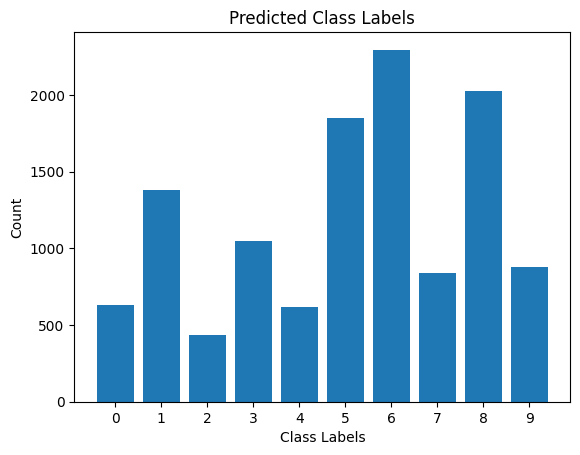

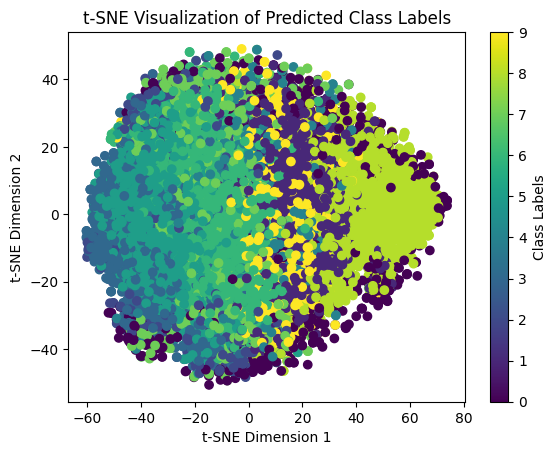

In [3]:

X = np.array(cifar['data'], dtype=float)
y = np.array(cifar['target'], dtype=int)

# Extract HOG features
X_features = []
for img in X:
    hog_features = hog(img.reshape(32, 32, 3), block_norm='L2-Hys', pixels_per_cell=(8, 8), cells_per_block=(2, 2), multichannel=True)
    X_features.append(hog_features)
X_features = np.array(X_features)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_features, y, test_size=0.2, random_state=42)

# Preprocessing and classifier pipeline
pipeline = make_pipeline(StandardScaler(), GaussianNB())

# Define the hyperparameters to tune
param_grid = {}

# Perform GridSearchCV to find the best hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Retrieve the best classifier after hyperparameter tuning
clf = grid_search.best_estimator_

# Make predictions on the test set
y_pred = clf.predict(X_test)

# Calculate performance metrics
precision = metrics.precision_score(y_test, y_pred, average='macro')
recall = metrics.recall_score(y_test, y_pred, average='macro')
f1_score = metrics.f1_score(y_test, y_pred, average='macro')
accuracy = metrics.accuracy_score(y_test, y_pred)

# Print the performance metrics
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1_score)
print("Accuracy:", accuracy)

# Create a bar plot of predicted class labels
import matplotlib.pyplot as plt

# Count the occurrences of each predicted class label
unique_labels, label_counts = np.unique(y_pred, return_counts=True)

# Create a bar plot
plt.bar(unique_labels, label_counts)
plt.xlabel('Class Labels')
plt.ylabel('Count')
plt.title('Predicted Class Labels')
plt.xticks(unique_labels)  # Set x-axis tick labels as class labels
plt.show()

# Perform t-SNE on the test set
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_test)

# Create a scatter plot of t-SNE visualization
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y_pred)
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.title('t-SNE Visualization of Predicted Class Labels')
plt.colorbar(label='Class Labels')
plt.show()

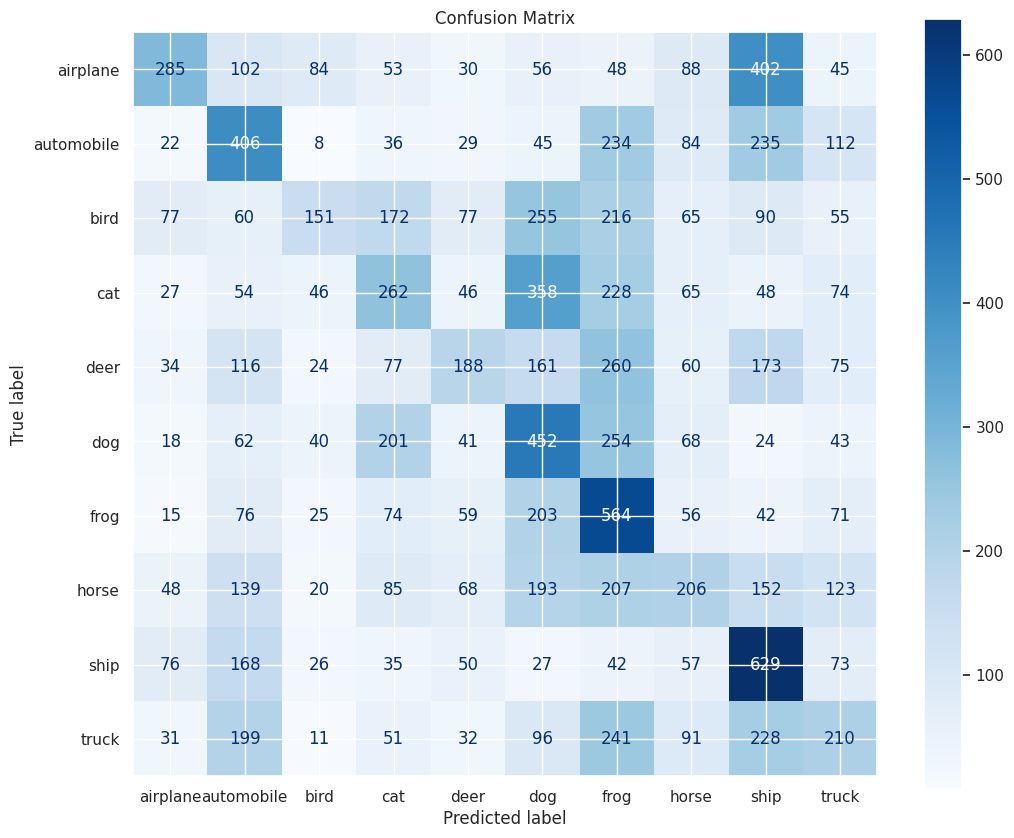

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import plot_tree

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"])
fig, ax = plt.subplots(figsize=(12, 10))
disp.plot(cmap='Blues', ax=ax)
plt.title("Confusion Matrix")
plt.show()